# Hypothesis testing: stock return value

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
# Load one year worth of Sony (6758.T) stock data (open/close/traded)
sony = pd.read_csv('data/sony-july-2018-july-2019.csv')
sony['DATE'] = pd.to_datetime(sony['DATE'], format='%Y-%m-%d')
sony.describe()

,OPEN_PRICE,DAILY_HIGH,DAILY_LOW,CLOSE_PRICE,TRADED_VOLUME,ADJUSTED_CLOSE_PRICE
count,260.000000,260.000000,260.000000,260.000000,2.600000e+02,260.000000
mean,5658.200000,5714.796154,5597.342308,5655.657692,7.158330e+06,5655.657692
std,495.892548,499.951110,490.490931,494.526842,3.377836e+06,494.526842
min,4550.000000,4638.000000,4507.000000,4630.000000,2.799300e+06,4630.000000
25%,5299.750000,5367.250000,5277.750000,5323.250000,5.026275e+06,5323.250000
50%,5622.500000,5690.000000,5559.500000,5623.500000,6.554000e+06,5623.500000
75%,6008.250000,6042.000000,5955.500000,5985.750000,7.897525e+06,5985.750000
max,6930.000000,6973.000000,6845.000000,6966.000000,2.728210e+07,6966.000000


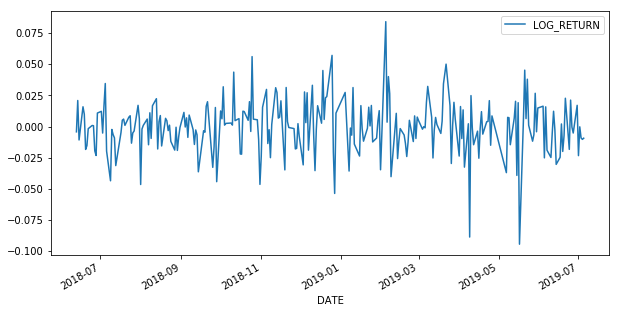

In [9]:
# log returns
sony['LOG_RETURN'] = np.log(sony['CLOSE_PRICE'].shift(1)) - np.log(sony['CLOSE_PRICE'])
sony.plot(x='DATE', y='LOG_RETURN', figsize=(10,5))

## Set the hypothesis

  * H_0: mean daily log return is zero;
  * H_alternative: mean daily log return is non-zero.

In [10]:
mean_under_null_hypothesis = 0

## Set required confidence level

In [26]:
alpha = 0.05 # 5%

## Calculate statistical properties of a sample of log returns

In [27]:
# Calculate properties of log-returns sample
mu = sony['LOG_RETURN'].mean()
sigma = sony['LOG_RETURN'].std(ddof=1)
sample_size = sony['LOG_RETURN'].shape[0]
print(f'Sample size: {sample_size}, Mean: {mu:.5f}, Standard Deviation: {sigma:.5f}')

Sample size: 260, Mean: -0.00032, Standard Deviation: 0.02128


## Calculate the test statistic z hat

In [28]:
z_hat = (mu - mean_under_null_hypothesis)/(sigma/sample_size**0.5)
print(f'z hat value: {z_hat}')

z hat value: -0.24176071522287768


## Set decision criteria

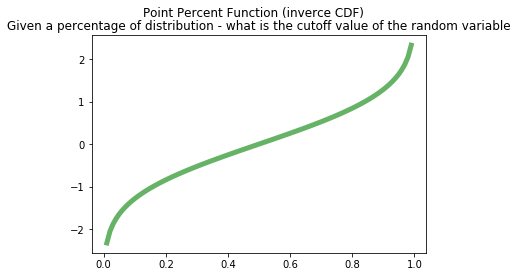

In [68]:
# Will be using Point Percent Function to define the decision criteria
x = np.linspace(0.0, 1.0, 100)
plt.suptitle('Point Percent Function (inverce CDF)')
plt.title('Given a percentage of distribution - what is the cutoff value of the random variable')
plt.plot(x, norm.ppf(x),'g-', lw=5, alpha=0.6, label='norm pdf')

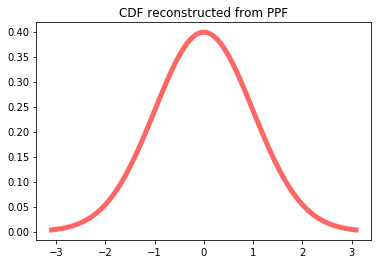

In [67]:
# Reconstructed CDF based on PPF
x = np.linspace(norm.ppf(0.001), norm.ppf(0.999), 100)
plt.title('CDF reconstructed from PPF')
plt.plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')

In [29]:
z_left = norm.ppf(alpha/2, 0, 1)
# z distribution is symmetric around zero
z_right = -z_left
print(f'Decision range: left: {z_left}, right: {z_right}')

Decision range: left: -1.9599639845400545, right: 1.9599639845400545


## Two tails hypothesis test: checking whether statistics (z hat) value is in the rejection range

In [30]:
is_alt_hypothesis_accepted = z_hat > z_left and z_hat < z_right
decision = 'accepted' if is_alt_hypothesis_accepted else 'rejected'
print(f'Alternative hypothesis is {decision}')

Alternative hypothesis is accepted


## Set a new hypothesis

  * H_0: mean log return is non-positive;
  * H_alternative: mean log return is positive.

In [31]:
z_hat = (mu - mean_under_null_hypothesis)/(sigma/sample_size**0.5)
print(f'z hat value: {z_hat}')

z hat value: -0.24176071522287768


## Set decision criteria for a one tail test

In [34]:
z_right = norm.ppf(1 - alpha, 0, 1)
print(f'Decistion boundary: {z_right}')

Decistion boundary: 1.6448536269514722


## One tail hypothesis test: checking whether statistics (z hat) value is larger that rejection boundary

In [35]:
is_alt_hypothesis_accepted = z_hat < z_right
decision = 'accepted' if is_alt_hypothesis_accepted else 'rejected'
print(f'Alternative hypothesis is {decision}')

Alternative hypothesis is accepted


## Alternative method: using a p-value

In [38]:
p = 1 - norm.cdf(z_hat, 0, 1)
print(f'p-value: {p}')

p-value: 0.5955172096416046


In [39]:
is_alt_hypothesis_accepted = p > alpha
decision = 'accepted' if is_alt_hypothesis_accepted else 'rejected'
print(f'With significance level {alpha} alternative hypothesis is {decision}')

With significance level 0.05 alternative hypothesis is accepted
